In [14]:
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image
# import seaborn
import seaborn as sns
import warnings

# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

warnings.filterwarnings("ignore")

## Uniform Distribution

In [ ]:
from scipy.stats import uniform

In [4]:
# random numbers from uniform distribution
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc = start, scale=width)

In [9]:
data_uniform

array([16.76073114, 19.21148333, 27.18452112, ..., 21.87067067,
       18.68076759, 28.78544777])

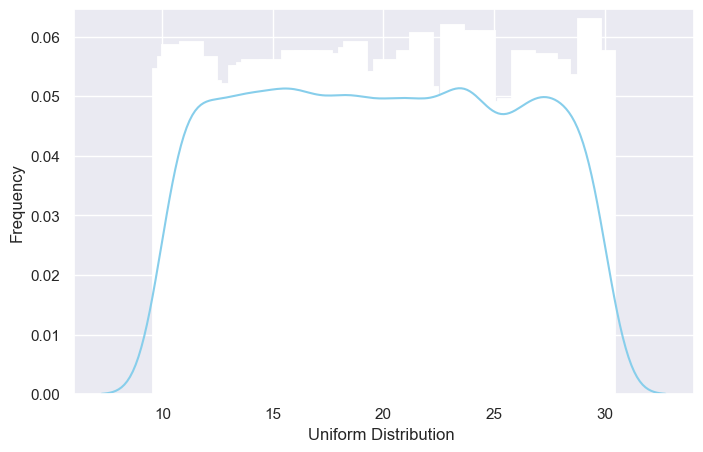

In [23]:
plt.figure(figsize=(8, 5))
ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

plt.show()

## Normal Distribution

In [17]:
from scipy.stats import norm
# generate random numbers from N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=1)

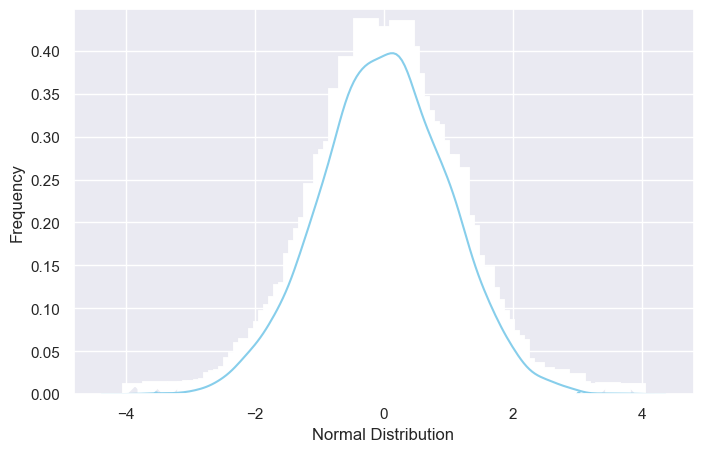

In [20]:
plt.figure(figsize=(8, 5))
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

plt.show()

## Gamma Distribution

In [21]:
from scipy.stats import gamma
data_gamma = gamma.rvs(a=5, size=10000)

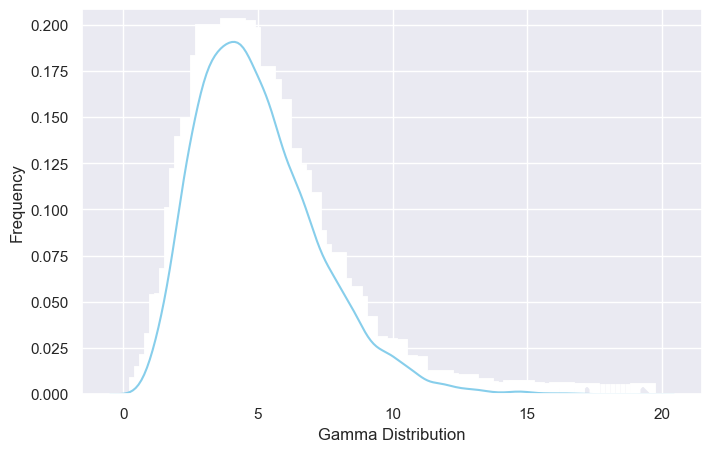

In [22]:
plt.figure(figsize=(8, 5))
ax = sns.distplot(data_gamma,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Gamma Distribution', ylabel='Frequency')

plt.show()

## Exponential Distribution

In [24]:
from scipy.stats import expon
data_expon = expon.rvs(scale=1,loc=0,size=1000)

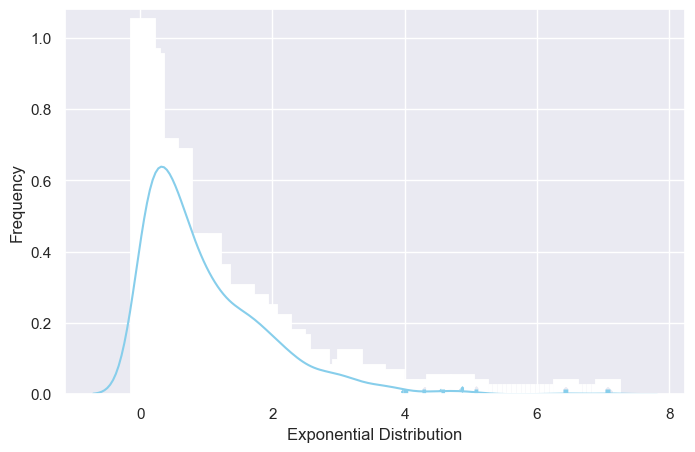

In [25]:
plt.figure(figsize=(8, 5))
ax = sns.distplot(data_expon,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

plt.show()

## Poisson Distribution

In [26]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3, size=10000)

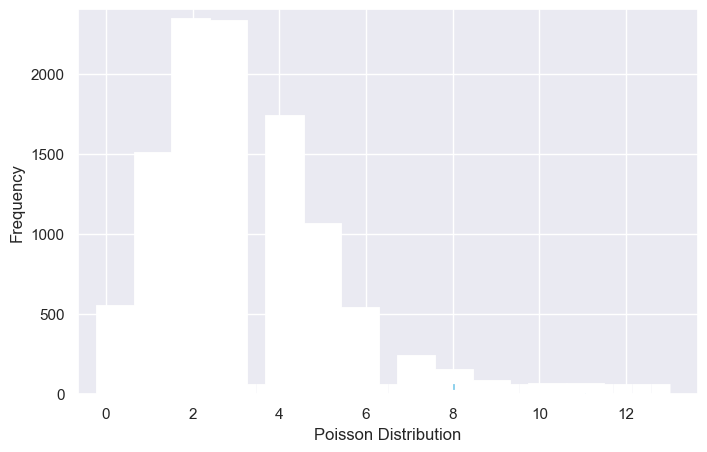

In [27]:
plt.figure(figsize=(8, 5))
ax = sns.distplot(data_poisson,
                  bins=30,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

plt.show()

## Binomial Distribution

In [28]:
from scipy.stats import binom
data_binom = binom.rvs(n=10,p=0.8,size=10000)

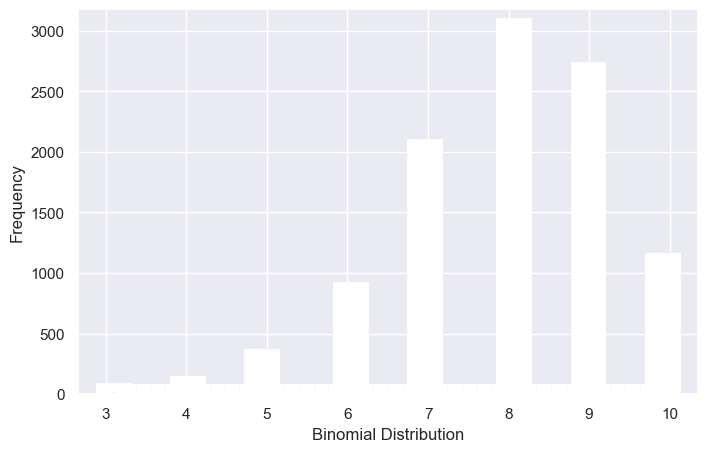

In [29]:
plt.figure(figsize=(8, 5))
ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

plt.show()

## Bernoulli Distribution

In [30]:
from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=10000,p=0.6)

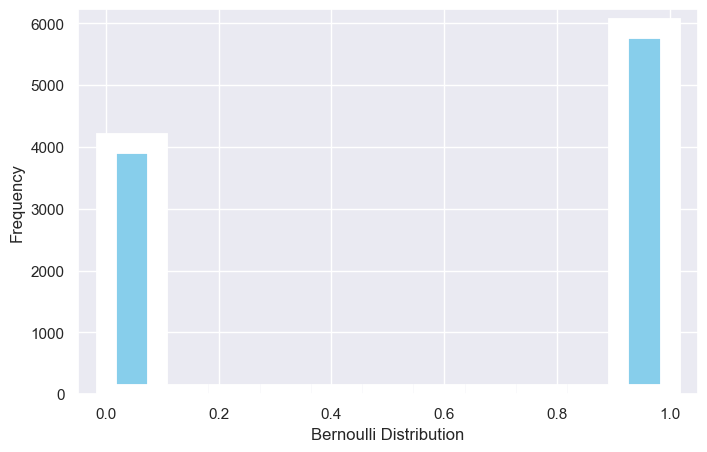

In [31]:
plt.figure(figsize=(8, 5))
ax= sns.distplot(data_bern,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

plt.show()

## Confidence Intervals

In [33]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [34]:
df["Sex1"] = df["sex"].replace({1: "Male", 0: "Female"})

In [36]:
dx = df[["target", "Sex1"]].dropna()

#### Standard Error for Population Proportion

In [38]:
pd.crosstab(dx.target, dx.Sex1)

Sex1,Female,Male
target,,
0,86,413
1,226,300


In [39]:
p_fm = 226/(86+226)
p_fm

0.7243589743589743

In [40]:
n = 86 + 226
n

312

In [41]:
se_female = np.sqrt(p_fm * (1 - p_fm) / n)
se_female

0.02529714756803247

In [42]:
z_score = 1.96
lcb = p_fm - z_score* se_female #lower limit of the CI
ucb = p_fm + z_score* se_female #upper limit of the CI
lcb, ucb

(0.6747765651256307, 0.773941383592318)

In [43]:
import statsmodels.api as sm
sm.stats.proportion_confint(n * p_fm, n, alpha=0.05)

(0.6747774762140357, 0.773940472503913)

#### Standard Error for Mean

In [44]:
df.groupby("Sex1").agg({"chol": [np.mean, np.std, np.size]})

chol                
              mean        std size
Sex1                              
Female  261.455128  64.466781  312
Male    239.237027  43.155535  713

In [47]:
mean_fe = 261.45  #mean cholesterol of female
sd = 64.4         #standard deviation for female population
n = 312           #Total number of female
z = 1.96          #z-score from the z table mentioned before

In [49]:
se = sd / np.sqrt(n)
se

3.6459320499455985

In [50]:
lcb = mean_fe - z* se  #lower limit of the CI
ucb = mean_fe + z* se  #upper limit of the CI
lcb, ucb

(254.3039731821066, 268.59602681789335)

In [51]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

In [52]:
np.random.seed(42)
normal_distribution_us_male_mass_pounds = np.random.normal(loc=181, scale=24, size=6000)
normal_distribution_us_female_mass_pounds = np.random.normal(loc=132, scale=22, size=6500)
all_mass_values = np.concatenate((normal_distribution_us_male_mass_pounds, normal_distribution_us_female_mass_pounds), axis=0)
df_ppl_mass = pd.DataFrame(data={'us_people_mass_pounds': all_mass_values})

In [56]:
df_ppl_mass.head()

,us_people_mass_pounds
0,192.921140
1,177.681657
2,196.544525
3,217.552717
4,175.380319


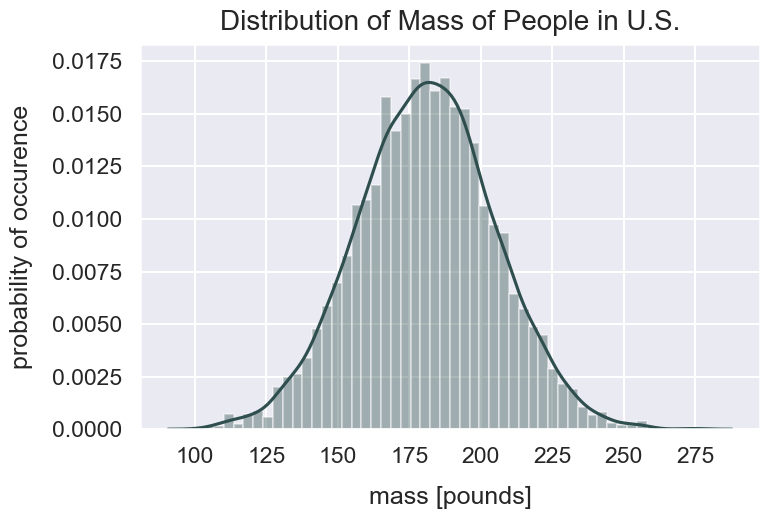

In [58]:
plt.figure(figsize=(8, 5))
sns.distplot(normal_distribution_us_male_mass_pounds, color="darkslategrey")
plt.xlabel("mass [pounds]", labelpad=14)
plt.ylabel("probability of occurence", labelpad=14)
plt.title("Distribution of Mass of People in U.S.", y=1.015, fontsize=20);

plt.show()

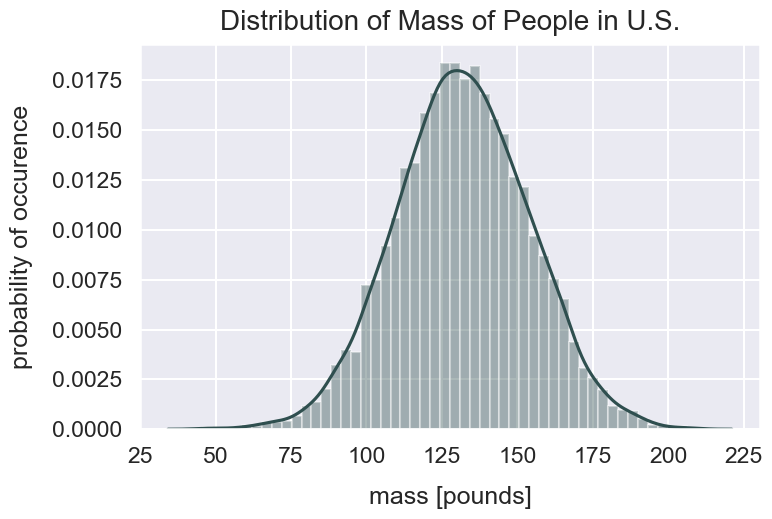

In [59]:
plt.figure(figsize=(8, 5))
sns.distplot(normal_distribution_us_female_mass_pounds, color="darkslategrey")
plt.xlabel("mass [pounds]", labelpad=14)
plt.ylabel("probability of occurence", labelpad=14)
plt.title("Distribution of Mass of People in U.S.", y=1.015, fontsize=20);

plt.show()

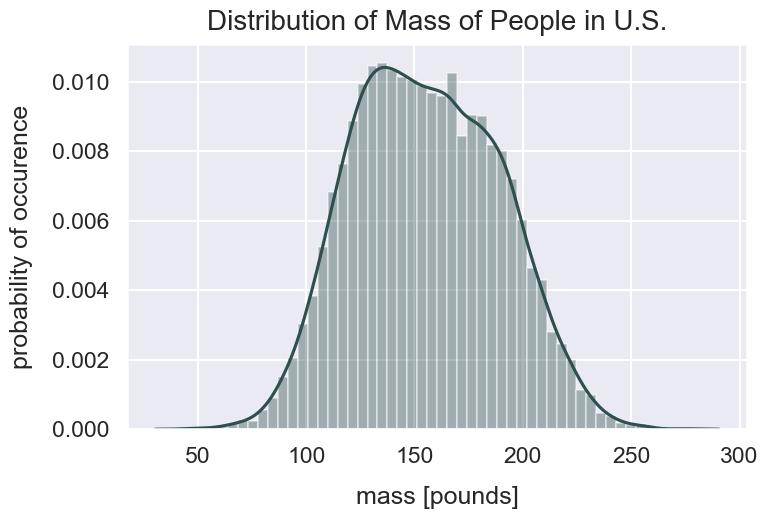

In [57]:
plt.figure(figsize=(8, 5))
sns.distplot(df_ppl_mass['us_people_mass_pounds'], color="darkslategrey")
plt.xlabel("mass [pounds]", labelpad=14)
plt.ylabel("probability of occurence", labelpad=14)
plt.title("Distribution of Mass of People in U.S.", y=1.015, fontsize=20);

plt.show()

In [60]:
# Calculation Population Mean
pop_mean_mass = df_ppl_mass['us_people_mass_pounds'].mean()
pop_mean_mass

155.42328059423372

In [61]:
# Calculate Population Standard Deviation
pop_std_dev_mass = df_ppl_mass['us_people_mass_pounds'].std()
pop_std_dev_mass

33.58519088395858

In [62]:
sample_means = []
n = 25
for sample in range(0, 300):
    # random sampling done with replacement
    sample_values = np.random.choice(a=df_ppl_mass['us_people_mass_pounds'], size=n)    
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)


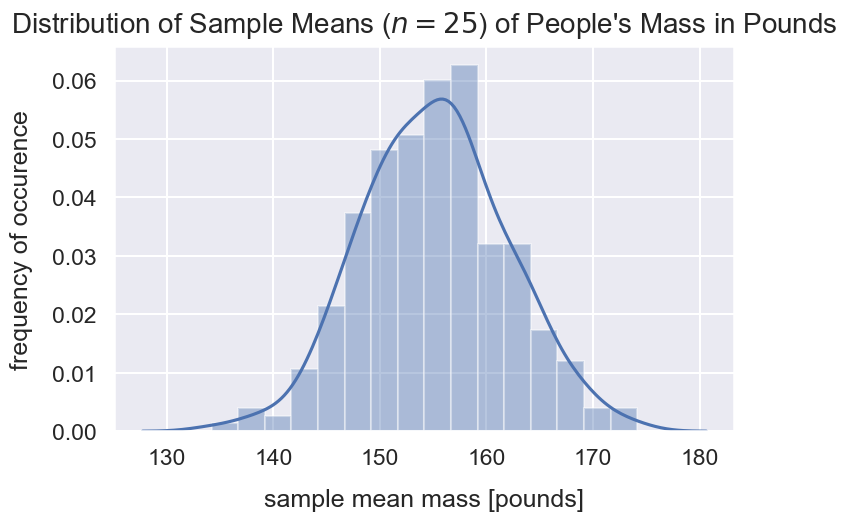

In [64]:
plt.figure(figsize=(8, 5))
# View Distribution of Sample Means (Otherwise Called Sampling Distribution)
sns.distplot(sample_means)
plt.title("Distribution of Sample Means ($n=25$) of People's Mass in Pounds", y=1.015, fontsize=20)
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

In [65]:
# Calculate Median of Sample Means
median_of_sample_means = np.median(sample_means)
median_of_sample_means

155.3008268518431

In [72]:
# Calculate Mean of Sample Means
mean_of_sample_means = np.mean(sample_means)
mean_of_sample_means

155.12418330193915

In [66]:
pop_mean_mass

155.42328059423372

In [67]:
# Calculate Standard Deviation of Sample Means
std_dev_of_sample_means = np.std(sample_means)
std_dev_of_sample_means

6.734407481483423

#### Standard deviation of sampling distribution

In [68]:
standard_error = pop_std_dev_mass/np.sqrt(n)
standard_error

6.717038176791716

### Z-Scores

In [69]:
tail = 1 - stats.norm.cdf(1.96)
tail

0.024997895148220484

In [71]:
stats.norm.cdf(1.96)

0.9750021048517795

In [70]:
# The area under the curve between the z-critcal scores is approximately 0.95
1 - (tail * 2)

0.950004209703559

In [73]:
lower_95_perc_bound = mean_of_sample_means - 1.96*standard_error
lower_95_perc_bound

141.95878847542738

In [74]:
upper_95_perc_bound = mean_of_sample_means + 1.96*standard_error
upper_95_perc_bound

168.28957812845093

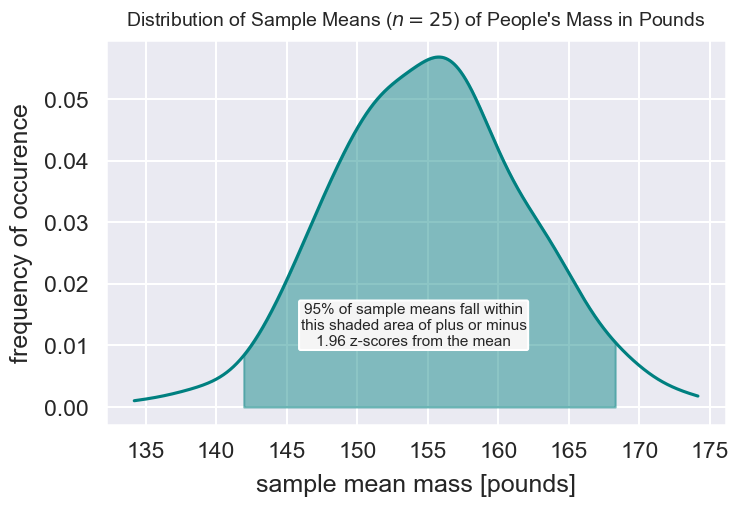

In [83]:
plt.figure(figsize=(8, 5))
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means), 10000)
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(lower_95_perc_bound, upper_95_perc_bound, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='teal',)
plt.text(x=154, y=.01, horizontalalignment='center', fontsize=11, 
         s="95% of sample means fall within\nthis shaded area of plus or minus\n1.96 z-scores from the mean", 
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.1"))
plt.title("Distribution of Sample Means ($n=25$) of People's Mass in Pounds", y=1.015, fontsize=14)
plt.xlabel("sample mean mass [pounds]", labelpad=8)
plt.ylabel("frequency of occurence", labelpad=8);

## Hypothesis Testing

```
H0 Ho == Hypothesis null
H1 Ha Hi == Hypothesis alternative


H0: x = 10
H1: x != 10

H0: x >= 10
H1: x < 10

H0: x <= 10
H1: x > 10
```

Researcher berpendapat bahwa jika pasien operasi lutut menjalani terapi fisik dua kali seminggu (bukan 3 kali), masa pemulihannya akan lebih lama. Waktu pemulihan rata-rata untuk pasien operasi lutut adalah 8.2 minggu.

Hypothesis statement dalam pertanyaan ini adalah bahwa researcher percaya waktu pemulihan rata-rata lebih dari 8.2 minggu. Ini dapat ditulis dalam istilah matematika sebagai: H1: μ> 8.2

Selanjutnya, kita harus menyatakan null hypothesis, yang akan terjadi jika researcher salah. Pada contoh di atas, jika peneliti salah maka waktu pemulihan kurang dari atau sama dengan 8,2 minggu. Dalam matematika, yaitu: H0 μ ≤ 8.2



**Interpret the p-value**

Kita menggambarkan temuan sebagai statistically significant dengan menafsirkan p-value.

Statistical hypothesis test dapat mengembalikan nilai yang disebut p atau p-value. Ini adalah kuantitas yang dapat kita gunakan untuk menafsirkan atau mengukur hasil tes: **reject or fail to reject the null hypothesis**. Ini dilakukan dengan **membandingkan p-value dengan nilai ambang yang dipilih sebelumnya yang disebut significance level**.

Significance level sering kali disebut dengan Greek lower case letter - alpha.

Nilai umum yang digunakan untuk alpha adalah 5% atau 0,05. Alpha value yang lebih kecil menunjukkan interpretasi yang lebih kuat dari null hypothesis, seperti 1% atau 0,1%.

p-value dibandingkan dengan alpha value yang dipilih sebelumnya. Hasil signifikan secara statistik saat p-value is less than alpha. Ini menandakan bahwa: default hypothesis dapat ditolak.

- If p-value > alpha: Fail to reject the null hypothesis (i.e. not signifiant result).
- If p-value <= alpha: Reject the null hypothesis (i.e. significant result).

In [85]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Research Question

Pada tahun-tahun sebelumnya, 52% orang tua percaya bahwa elektronik dan media sosial adalah penyebab kurang tidur remaja mereka. Apakah saat ini semakin banyak orang tua yang percaya bahwa kurang tidur remaja mereka disebabkan oleh elektronik dan media sosial?

Population: Orang tua dengan remaja (usia 13-18)
Parameter of Interest: p

Null Hypothesis: p = 0.52
Alternative Hypthosis: p > 0.52 (note that this is a one-sided test)

Data: 1018 orang disurvei. 56% dari mereka yang disurvei percaya bahwa kurang tidur remaja mereka disebabkan oleh elektronik dan media sosial.

In [86]:
n = 1018
pnull = .52
phat = .56

In [89]:
sm.stats.proportions_ztest(phat * n, n, pnull, alternative='larger')

(2.571067795759113, 0.005069273865860533)

#### Difference in Population Means

In [90]:
# !wget https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/nhanes_2015_2016.csv

--2023-09-19 20:49:52--  https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/nhanes_2015_2016.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8000::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 553446 (540K) [text/plain]
Saving to: ‘nhanes_2015_2016.csv’

nhanes_2015_2016.cs 100%[===================>] 540.47K  --.-KB/s    in 0.06s   

2023-09-19 20:49:52 (9.40 MB/s) - ‘nhanes_2015_2016.csv’ saved [553446/553446]



Research Question

Dengan mempertimbangkan data NHANES, apakah pria memiliki Body Mass Index rata-rata yang lebih tinggi secara signifikan daripada wanita?

Population: Adults in the NHANES data.
Parameter of Interest: μ1−μ2, Body Mass Index.

Null Hypothesis: μ1=μ2
Alternative Hypthosis: μ1≠μ2

Data:

2976 Females

μ1=29.94

σ1=7.75


2759 Male Adults

μ2=28.78

σ2=6.25



μ1−μ2=1.16

In [91]:
url = "https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/nhanes_2015_2016.csv"
da = pd.read_csv(url)
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [92]:
females = da[da["RIAGENDR"] == 2]
male = da[da["RIAGENDR"] == 1]

In [96]:
n1 = len(females)
mu1 = females["BMXBMI"].mean()
sd1 = females["BMXBMI"].std()

(n1, mu1, sd1)

(2976, 29.93994565217392, 7.753318809545674)

In [97]:
n2 = len(male)
mu2 = male["BMXBMI"].mean()
sd2 = male["BMXBMI"].std()

(n2, mu2, sd2)

(2759, 28.778072111846942, 6.2525676168014614)

In [98]:
sm.stats.ztest(females["BMXBMI"].dropna(), male["BMXBMI"].dropna(),alternative='two-sided')

(6.1755933531383205, 6.591544431126401e-10)

In [106]:
print(f"{6.591544431126401e-10:.11f}")

0.00000000066


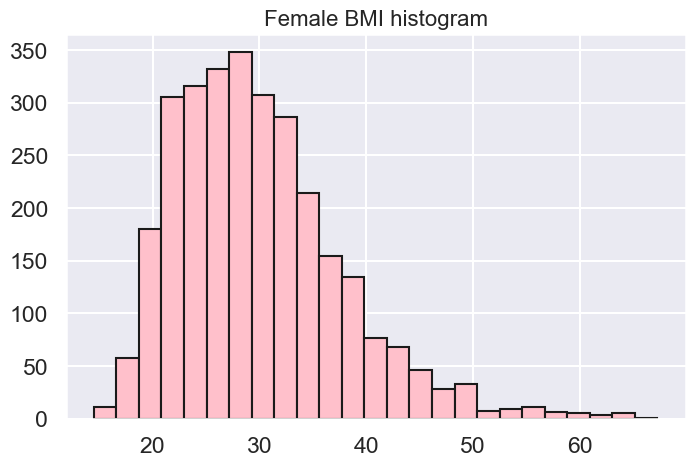

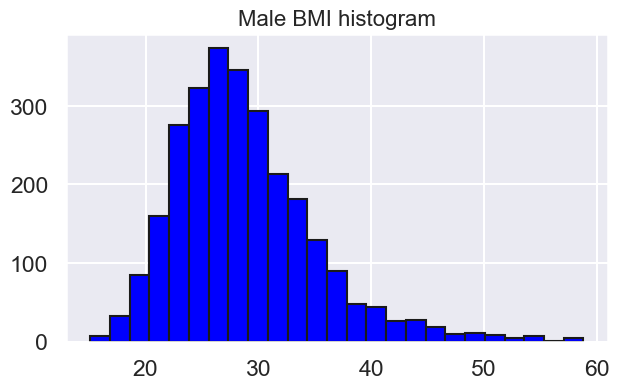

In [107]:
plt.figure(figsize=(8,5))
plt.title("Female BMI histogram",fontsize=16)
plt.hist(females["BMXBMI"].dropna(),edgecolor='k',color='pink',bins=25)
plt.show()

plt.figure(figsize=(7,4))
plt.title("Male BMI histogram",fontsize=16)
plt.hist(male["BMXBMI"].dropna(),edgecolor='k',color='blue',bins=25)
plt.show()

### Hypothesis Testing One Proportion

In [108]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats.distributions as dist
df = pd.read_csv('data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Kolom terakhir dari data adalah 'target'. Menandakan jika seseorang menderita penyakit jantung atau tidak. Pertanyaan penelitiannya adalah, “The population proportion of Ireland having heart disease is 42%. Are more people suffering from heart disease in the US”?

Sekarang, temukan jawaban atas pertanyaan penelitian ini selangkah demi selangkah.

Step 1: define the null hypothesis and alternative hypothesis.

Dalam permasalahan ini, null hypothesis adalah population proportion yang menderita penyakit jantung di AS kurang dari atau sama dengan 42%.

Dan hipotesis alternatifnya adalah proporsi penduduk Amerika Serikat yang menderita penyakit jantung lebih dari 42%.

- Ho: p0 <= 0.42  #null hypothesis
- Ha: p > 0.42   #alternative hypothesis

In [110]:
p_us = len(df[df['target']==1])/len(df)
p_us

0.5131707317073171

In [112]:
se = np.sqrt(0.42 * (1-0.42) / len(df))
se

0.015416177755376521

In [113]:
#Best estimate
be = p_us

#hypothesized estimate
he = 0.42
test_stat = (be - he)/se
test_stat

6.04369858636477

In [115]:
pvalue = 2*dist.norm.cdf(-np.abs(test_stat))
pvalue

1.5062078087269162e-09

## Normality Test
- H0: the sample has a Gaussian distribution.
- H1: the sample does not have a Gaussian distribution.

### Shapiro-Wilk Test

In [116]:

# Example of the Shapiro-Wilk Normality Test

from scipy.stats import shapiro
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.895, p=0.193
Probably Gaussian


### D’Agostino’s K^2 Test

In [117]:

# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=3.392, p=0.183
Probably Gaussian


### Anderson-Darling Test

In [118]:
# Example of the Anderson-Darling Normality Test
from scipy.stats import anderson
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=0.424
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


## Correlation Tests
- H0: the two samples are independent.
- H1: there is a dependency between the samples.

### Pearson’s Correlation Coefficient


In [119]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.688, p=0.028
Probably dependent


### Spearman’s Rank Correlation

In [120]:
# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.855, p=0.002
Probably dependent


### Kendall’s Rank Correlation

In [121]:
# Example of the Kendall's Rank Correlation Test
from scipy.stats import kendalltau
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.733, p=0.002
Probably dependent


### Chi-Squared Test

In [122]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
table = [[10, 20, 30],[6,  9,  17]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.272, p=0.873
Probably independent


## Stationary Tests
- H0: a unit root is present (series is non-stationary).
- H1: a unit root is not present (series is stationary).


### Augmented Dickey-Fuller Unit Root Test

In [123]:
# Example of the Augmented Dickey-Fuller unit root test
from statsmodels.tsa.stattools import adfuller
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, obs, crit, t = adfuller(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably not Stationary')
else:
    print('Probably Stationary')

stat=0.517, p=0.985
Probably not Stationary


### Kwiatkowski-Phillips-Schmidt-Shin

In [124]:
# Example of the Kwiatkowski-Phillips-Schmidt-Shin test
from statsmodels.tsa.stattools import kpss
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, crit = kpss(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably not Stationary')
else:
    print('Probably Stationary')

stat=0.594, p=0.023
Probably Stationary


## Parametric Statistical Hypothesis Tests


### Student’s t-test

In [125]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=-0.326, p=0.748
Probably the same distribution


### Paired Student’s t-test

In [127]:
# Example of the Paired Student's t-test
from scipy.stats import ttest_rel
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=-0.334, p=0.746
Probably the same distribution


### Analysis of Variance Test (ANOVA)

In [128]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.096, p=0.908
Probably the same distribution


## Nonparametric Statistical Hypothesis Tests

### Mann-Whitney U Test

In [129]:
# Example of the Mann-Whitney U Test
from scipy.stats import mannwhitneyu
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=40.000, p=0.473
Probably the same distribution


### Wilcoxon Signed-Rank Test

In [130]:
# Example of the Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=21.000, p=0.557
Probably the same distribution


### Kruskal-Wallis H Test

In [131]:
# Example of the Kruskal-Wallis H Test
from scipy.stats import kruskal
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.571, p=0.450
Probably the same distribution
